# 导入模块

In [1]:
# 使用KMeans进行聚类,导入库
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
# 预处理
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# 矩阵运算
import numpy as np

# 数据加载

In [2]:

# 数据加载
data = pd.read_csv('./car_price.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# 字段说明

| 字段 | 说明 |
| :------ | ---------- |
| Car_ID                    | 汽车编号   |
| Symboling                 | 车险等级   |
| carCompany                | 汽车厂商   |
| fueltype                  | 燃料类型   |
| aspiration                | 吸气类型   |
| doornumber                | 车门数     |
| carbody                   | 车身类型   |
| drivewheel                | 驱动类型   |
| enginelocation            | 引擎位置   |
| wheelbase                 | 轴距       |
| carlength                 | 车长       |
| carwidth                  | 车宽       |
| carheight                 | 车高       |
| curbweight                | 整备重量   |
| enginetype                | 发动机类型 |
| cylindernumber            | 气缸号     |
| enginesize                | 发动机尺寸 |
| fuelsystem                | 燃料系统   |
| boreratio                 | 汽车传动比 |
| stroke                    | 发动机冲程 |
| compressionratio          | 汽车压缩比 |
| horsepower                | 马力       |
| peakrpm                   | 峰值转速   |
| citympg                   | 城市里程   |
| highwaympg                | 高速里程   |
| price(Dependent variable) | 车辆价格 |

In [3]:
# 删除，无价值的特征
train_x = data.drop(['car_ID','CarName'],axis = 1)
train_x

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# 特征工程

In [4]:
# 将非数值字段转化为数值
le = LabelEncoder()
columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
           'enginetype','cylindernumber','fuelsystem']
for column in columns:
    # 训练并将标签转换为归一化的编码。
    train_x[column] = le.fit_transform(train_x[column])
train_x

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


# 归一化处理

In [5]:
# 规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()
# MinMaxScaler()将每个要素缩放到给定范围，拟合数据，然后对其进行转换。
train_x = min_max_scaler.fit_transform(train_x)
train_x

array([[1.        , 1.        , 0.        , ..., 0.22222222, 0.28947368,
        0.20795889],
       [1.        , 1.        , 0.        , ..., 0.22222222, 0.28947368,
        0.28255797],
       [0.6       , 1.        , 0.        , ..., 0.16666667, 0.26315789,
        0.28255797],
       ...,
       [0.2       , 1.        , 0.        , ..., 0.13888889, 0.18421053,
        0.40631051],
       [0.2       , 0.        , 1.        , ..., 0.36111111, 0.28947368,
        0.43076312],
       [0.2       , 1.        , 1.        , ..., 0.16666667, 0.23684211,
        0.43461099]])

# 聚类参数选择

字体选择

In [6]:
# 查找自己电脑上的中文字体，从打印输出中找到对应中文字体
# 本电脑上，我选择：Songti SC（注意，电脑不同，字体可能不同，需要自己修改）
from matplotlib.font_manager import FontManager
fm = FontManager()
[font.name for font in fm.ttflist]

['DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Serif',
 'cmtt10',
 'DejaVu Sans Mono',
 'cmb10',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'cmr10',
 'DejaVu Sans Display',
 'cmex10',
 'STIXGeneral',
 'DejaVu Serif Display',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Serif',
 'cmsy10',
 'STIXSizeOneSym',
 'cmss10',
 'DejaVu Serif',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'cmmi10',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'STIXIntegralsUp',
 'Noto Sans Sundanese',
 'Noto Sans NKo',
 'Noto Sans Lisu',
 'Beirut',
 'Webdings',
 'Noto Sans Egyptian Hieroglyphs',
 'Noto Sans Adlam',
 'Wingdings',
 'DIN Condensed',
 'STIXSizeOneSym',
 'Noto Sans Tifinagh',
 'Noto Sans Palmyrene',
 'Hiragino Sans',
 'Noto Sans Sharada',
 'American Typewriter',
 

字体设置

In [7]:
plt.rcParams['font.family'] = 'Songti SC'
plt.rcParams['font.size'] = 20

## SSE（簇惯性）

<font size = 12 color = 'red'>$SSE = \sum\limits_{i = 0}^k\sum\limits_{j = 0}^{m_i}||x_j^{(i)} - \mu^{(i)}||_2^2 \quad $</font>

k 表示簇数量

$m_i$ 表示第 i 簇中样本数量

$x_j^{(i)}$ 表示第 i 簇中第 j 个样本

$\mu^{(i)}$ 表示第 i 簇中心

## 轮廓系数

* 第 $i$ 个样本与簇内的其他点之间的平均距离作为簇内的**内聚度** $a^{(i)}$

* 第 $i$ 样本与最近簇中所有点之间的平均距离看作是与最近簇的**分离度** $b^{(i)}$

* 将簇的分离度与簇内聚度之差除以二者中比较大的数得到**轮廓系数**，计算公式如下：



<font size = 12 color = 'green'>$S^{(i)} = \frac{|b^{(i)} - a^{(i)}|}{max \{b^{(i)},\ a^{(i)}\}}$</font>



将所有点的轮廓系数求平均，就是该聚类结果总的**轮廓系数**！

## 聚类筛选

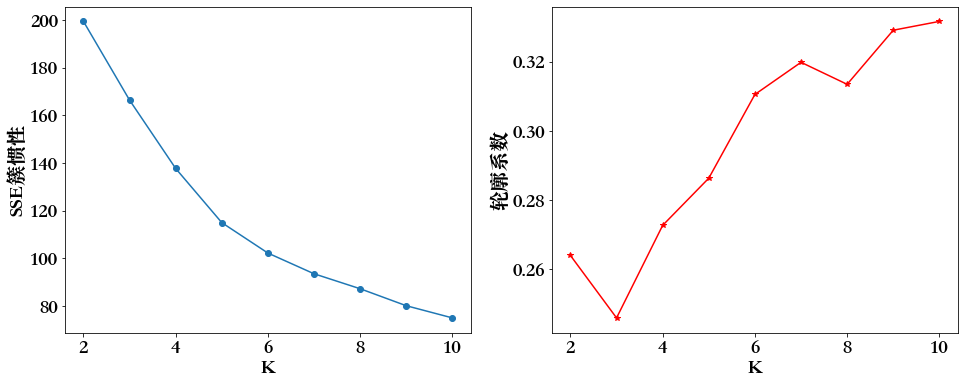

In [8]:
# 选择聚类组数
# 每簇样本到其聚类中心的距离的平方和
# 各个簇的inertia相加的和越小，即簇内越相似
# 但是k越大inertia越小，追求k越大对应用无益处
sse = [] # 簇惯性
ss = [] # 轮廓系数
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_x)
    # 计算inertia簇内误差平方和
    sse.append(kmeans.inertia_)
    ss.append(silhouette_score(train_x,kmeans.predict(train_x)))


plt.figure(figsize=(16,6))
x = range(2, 11)
plt.subplot(1,2,1)
plt.plot(x, sse, 'o-')
plt.xlabel('K')
plt.ylabel('SSE簇惯性')

plt.subplot(1,2,2)
plt.plot(x,ss,'r*-')
plt.xlabel('K')
plt.ylabel('轮廓系数')
# plt.savefig('./1-聚类簇数.png',dpi = 200)

## 聚类运算

In [10]:
# 使用KMeans聚类,分成8类
kmeans = KMeans(n_clusters=10)
kmeans.fit(train_x)  # 建模
# 预测
predict_y = kmeans.predict(train_x)
predict_y

array([4, 4, 4, 0, 0, 4, 0, 0, 9, 7, 4, 6, 4, 6, 6, 6, 8, 8, 2, 2, 1, 2,
       2, 7, 1, 1, 1, 7, 1, 7, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1,
       2, 1, 4, 8, 8, 8, 2, 2, 2, 1, 1, 4, 4, 4, 4, 2, 1, 2, 1, 5, 1, 6,
       5, 3, 3, 3, 3, 8, 4, 8, 8, 7, 2, 2, 2, 7, 7, 2, 7, 7, 7, 1, 1, 9,
       0, 2, 5, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0, 4, 7, 4, 6, 3, 6,
       3, 6, 3, 6, 3, 6, 3, 9, 2, 7, 1, 1, 1, 1, 7, 4, 4, 4, 4, 4, 0, 4,
       4, 0, 4, 0, 7, 9, 2, 2, 2, 1, 1, 0, 1, 9, 1, 0, 1, 9, 2, 2, 1, 1,
       1, 1, 1, 1, 5, 5, 1, 1, 1, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 0, 3, 0,
       0, 0, 4, 4, 6, 6, 5, 2, 5, 0, 0, 5, 0, 4, 4, 0, 3, 0, 6, 6, 6, 6,
       9, 9, 6, 9, 6, 3, 9], dtype=int32)

# 结果分析

## 结果合并

In [11]:
# 合并聚类结果，插入到原数据中,axis： 需要合并链接的轴，0是行，1是列 
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
# 将结果列重命名为'聚类结果'
result.rename({0:u'聚类结果'},axis=1,inplace=True)
result

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,聚类结果
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,4
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,4
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,4
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,6
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,9
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,6
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,3


In [12]:
# 分组运算
g1 = result.groupby(by = ['聚类结果','carbody'])[['price']].mean()
g1

price
聚类结果 carbody                  
0    hatchback    10618.000000
     sedan        12237.375000
     wagon        13020.400000
1    hatchback     7813.714286
     sedan         7891.460000
     wagon         7955.500000
2    hardtop       8249.000000
     hatchback     6789.857143
     sedan         7820.214286
3    hardtop      28176.000000
     sedan        19026.875000
     wagon        19727.666667
4    convertible  21890.500000
     hardtop      19168.600000
     hatchback    14686.394737
     sedan        15487.000000
5    hatchback     7788.000000
     sedan         9914.428571
6    sedan        18360.769231
     wagon        14963.000000
7    hatchback    13345.243615
     sedan         8558.000000
8    hardtop      45400.000000
     sedan        36734.142857
9    sedan        17659.125000
     wagon        15322.000000

In [13]:
g2 = g1.unstack() # 重塑，行变成了列
g2

price                                                   
carbody convertible  hardtop     hatchback         sedan         wagon
聚类结果                                                                  
0               NaN      NaN  10618.000000  12237.375000  13020.400000
1               NaN      NaN   7813.714286   7891.460000   7955.500000
2               NaN   8249.0   6789.857143   7820.214286           NaN
3               NaN  28176.0           NaN  19026.875000  19727.666667
4           21890.5  19168.6  14686.394737  15487.000000           NaN
5               NaN      NaN   7788.000000   9914.428571           NaN
6               NaN      NaN           NaN  18360.769231  14963.000000
7               NaN      NaN  13345.243615   8558.000000           NaN
8               NaN  45400.0           NaN  36734.142857           NaN
9               NaN      NaN           NaN  17659.125000  15322.000000

In [14]:
g2.sort_values(by = ('price','sedan'))

price                                                   
carbody convertible  hardtop     hatchback         sedan         wagon
聚类结果                                                                  
2               NaN   8249.0   6789.857143   7820.214286           NaN
1               NaN      NaN   7813.714286   7891.460000   7955.500000
7               NaN      NaN  13345.243615   8558.000000           NaN
5               NaN      NaN   7788.000000   9914.428571           NaN
0               NaN      NaN  10618.000000  12237.375000  13020.400000
4           21890.5  19168.6  14686.394737  15487.000000           NaN
9               NaN      NaN           NaN  17659.125000  15322.000000
6               NaN      NaN           NaN  18360.769231  14963.000000
3               NaN  28176.0           NaN  19026.875000  19727.666667
8               NaN  45400.0           NaN  36734.142857           NaN

## 低端轿车聚类结果

In [15]:
# 查看：类别是1的标准三厢车（具体根据分组运算结果确定）
cond = result.apply(lambda x : x['聚类结果'] == 2 and 'sedan' in x['carbody'],axis = 1)

columns = ['CarName',"wheelbase", "price",'horsepower','carbody','fueltype','聚类结果']
# 价格降序排名
result[cond][columns].sort_values('price',ascending = False)

,CarName,wheelbase,price,horsepower,carbody,fueltype,聚类结果
42,honda civic (auto),96.5,10345.0,100,sedan,gas,2
44,isuzu D-Max,94.5,8916.5,70,sedan,gas,2
163,toyota corolla liftback,94.5,8058.0,70,sedan,gas,2
183,volkswagen 1131 deluxe sedan,97.3,7975.0,85,sedan,gas,2
94,nissan leaf,94.5,7299.0,69,sedan,gas,2
91,nissan rogue,94.5,6649.0,69,sedan,gas,2
89,Nissan versa,94.5,5499.0,69,sedan,gas,2


## 高端轿车聚类结果

In [16]:
# 根据条件（售价）筛选高端轿车（三厢车）
cond = result.apply(lambda x : x['聚类结果'] == 8  and 'sedan' in x['carbody'],axis =1)

columns = ['CarName',"wheelbase", "price",'horsepower','carbody','fueltype','聚类结果']
result[cond][columns].sort_values('price',ascending = False)

,CarName,wheelbase,price,horsepower,carbody,fueltype,聚类结果
16,bmw x5,103.5,41315.0,182,sedan,gas,8
73,buick century special,120.9,40960.0,184,sedan,gas,8
17,bmw x3,110.0,36880.0,182,sedan,gas,8
49,jaguar xk,102.0,36000.0,262,sedan,gas,8
48,jaguar xf,113.0,35550.0,176,sedan,gas,8
71,buick opel isuzu deluxe,115.6,34184.0,155,sedan,gas,8
47,jaguar xj,113.0,32250.0,176,sedan,gas,8


In [17]:
cond

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

## 中端SUV聚类结果

In [18]:
# 根据条件（售价）筛选中端SUV轿车
cond = result.apply(lambda x : x['聚类结果'] == 0 and 'wagon' in x['carbody'],axis =1)
columns = ['CarName',"wheelbase", "price",'horsepower','carbody','fueltype','聚类结果']
result[cond][columns].sort_values('price',ascending = False)

,CarName,wheelbase,price,horsepower,carbody,fueltype,聚类结果
7,audi 5000,105.8,18920.0,110,wagon,gas,0
102,nissan fuga,100.4,14399.0,152,wagon,gas,0
193,volkswagen dasher,100.4,12290.0,88,wagon,gas,0
147,subaru tribeca,97.0,10198.0,94,wagon,gas,0
130,renault 12tl,96.1,9295.0,90,wagon,gas,0
